In [1]:
import numpy as np
import matplotlib.pyplot as plt
import probml_utils as pml
from scipy.io import loadmat
import requests
from io import BytesIO
from mpl_toolkits.mplot3d import Axes3D

url = "https://raw.githubusercontent.com/probml/probml-data/main/data/moteData/moteData.mat"
response = requests.get(url)

C:\Users\XC\AppData\Local\Temp\ipykernel_15692\609072033.py:30: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  w = np.linalg.lstsq(phi, y)[0]


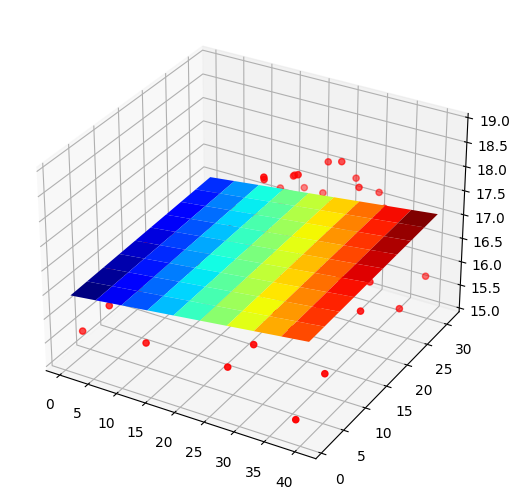

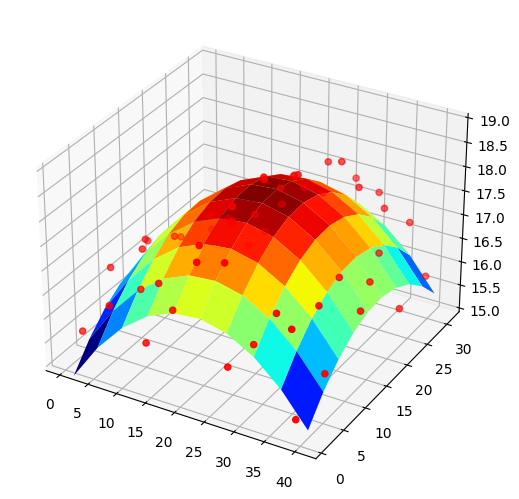

In [2]:
rawdata = BytesIO(response.content)
data = loadmat(rawdata)

X = data["X"]
y = data["y"]

n = len(y)
X_pad = np.column_stack((np.ones(n), X))


for use_quad in (False, True):
    phi = X_pad

    if use_quad:
        phi = np.column_stack((X_pad, X**2))

    fig = plt.figure()
    # ax = Axes3D(fig) # 官方给出的这行代码有问题
    ax = Axes3D(fig,auto_add_to_figure=False)
    fig.add_axes(ax)
    ax.set_zlim(15, 19)
    ax.scatter(X[:, 0], X[:, 1], y, color="r")

    n = 10
    xrange = np.linspace(min(X[:, 0]), max(X[:, 0]), n)
    yrange = np.linspace(min(X[:, 1]), max(X[:, 1]), n)
    xx, yy = np.meshgrid(xrange, yrange)
    flatxx = xx.reshape((n**2, 1))
    flatyy = yy.reshape((n**2, 1))
    w = np.linalg.lstsq(phi, y)[0]

    z = np.column_stack((flatxx, flatyy))
    z = np.column_stack((np.ones(n**2), z))
    if use_quad:
        z = np.column_stack((z, flatxx**2, flatyy**2))

    f = np.dot(z, w)
    ax.plot_surface(xx, yy, f.reshape(n, n), rstride=1, cstride=1, cmap="jet")

    name = "linregSurfaceLinear.pdf"
    if use_quad:
        name = "linregSurfaceQuad.pdf"

    # pml.savefig(name)
    plt.show()